In [1]:
pwd

'/scratch/hp2173/mri'

# 2.Preprocess the Datasets

In [2]:
pip install nibabel

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt

## 1) Visualize the MRI images 

<ipython-input-3-daae39f04b2f>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  T1_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_mprage_pp.nii').get_data()
<ipython-input-3-daae39f04b2f>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  T2_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_t2_pp.nii').get_data()
<ipython-input-3-daae39f04b2f>:3: DeprecationWarning: get_data() is de

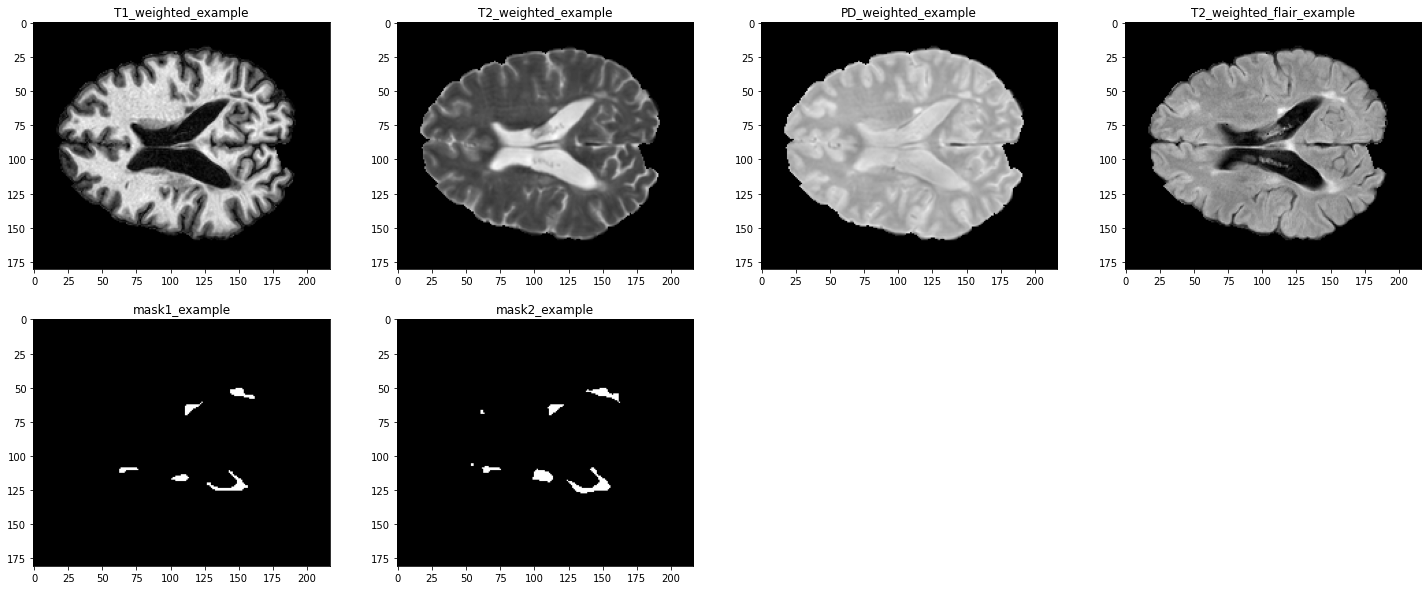

In [3]:
T1_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_mprage_pp.nii').get_data()
T2_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_t2_pp.nii').get_data()
PD_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_pd_pp.nii').get_data()
T2_weighted_flair_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_flair_pp.nii').get_data()
mask1_example = nib.load('/scratch/hp2173/training/training01/masks/training01_01_mask1.nii').get_data()
mask2_example = nib.load('/scratch/hp2173/training/training01/masks/training01_01_mask2.nii').get_data()
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
plt.imshow(T1_weighted_example[:,:,90],'gray')
plt.title('T1_weighted_example')
plt.subplot(2,4,2)
plt.imshow(T2_weighted_example[:,:,90],'gray')
plt.title('T2_weighted_example')
plt.subplot(2,4,3)
plt.imshow(PD_weighted_example[:,:,90],'gray')
plt.title('PD_weighted_example')
plt.subplot(2,4,4)
plt.imshow(T2_weighted_flair_example[:,:,90],'gray')
plt.title('T2_weighted_flair_example')
plt.subplot(2,4,5)
plt.imshow(mask1_example[:,:,90],'gray')
plt.title('mask1_example')
plt.subplot(2,4,6)
plt.imshow(mask2_example[:,:,90],'gray')
plt.title('mask2_example')

plt.pause(3)

In [4]:
# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets
# slide through dicom images using a slide bar 
def dicom_animation(x):
    plt.figure(figsize=(20,10))
    plt.imshow(T1_weighted_example[:,:,x],'gray')
    return x
interact(dicom_animation, x=(0, len(T1_weighted_example)-1))

interactive(children=(IntSlider(value=90, description='x', max=180), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_animation(x)>

## 2) Define function to process 2 raters' groundtruth  

In [3]:
def weight_ground_truth(mask1_path, mask2_path):
  mask1=nib.load(mask1_path).get_data()
  mask2=nib.load(mask2_path).get_data()
  if mask1.shape==mask2.shape:
    fig_shape = mask1.shape 
  else:
    print('Number inconformity for mask, double check path!')
  
  n=fig_shape[2]

  mask_and_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
  mask_or_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
  mask_rnd_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)

  for i in range(n):
    mask_and_weight[:,:,i] = mask1[:,:,i] & mask2[:,:,i]
    mask_or_weight[:,:,i] = mask1[:,:,i] | mask2[:,:,i]
    mask_rnd_weight = (mask_or_weight - mask_and_weight)*np.random.randint(0,2,(fig_shape[0],fig_shape[1],n)) + mask_and_weight


  return mask_and_weight, mask_or_weight, mask_rnd_weight


<ipython-input-5-527bb657da25>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask1=nib.load(mask1_path).get_data()
<ipython-input-5-527bb657da25>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask2=nib.load(mask2_path).get_data()


Text(0.5, 1.0, 'mask_rnd_weight')

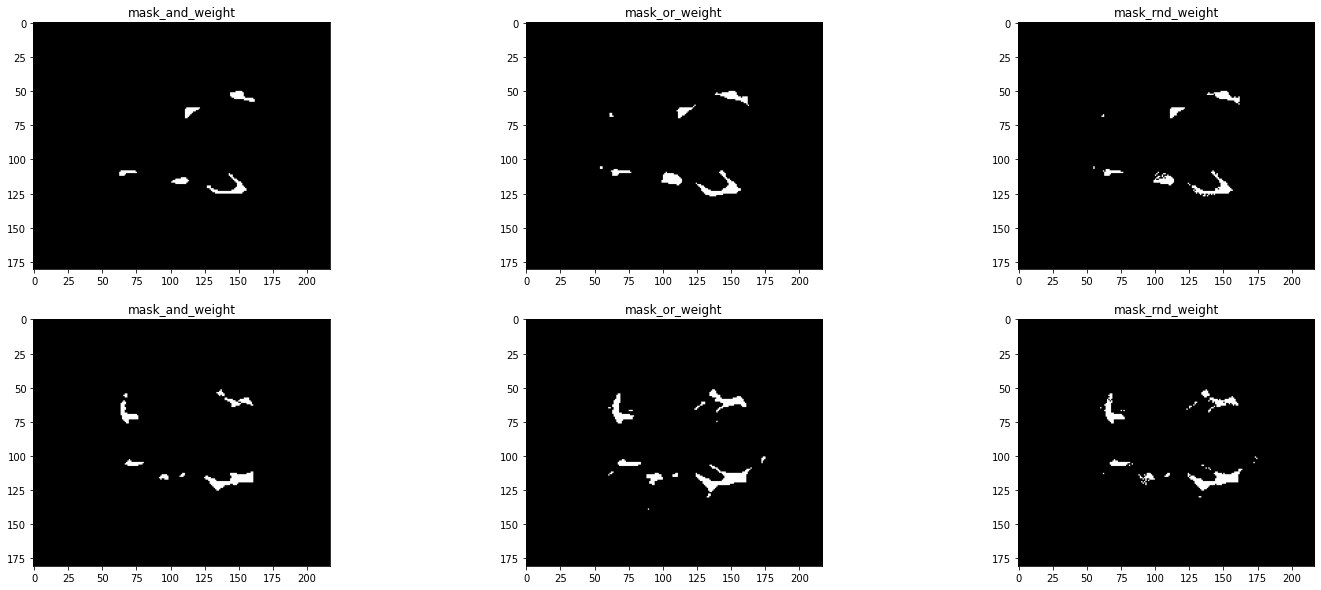

In [6]:
root = '/scratch/hp2173/training/'
#mask_or_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
#mask_and_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
mask1_path = os.path.join(root,'training01/masks/training01_01_mask1.nii')
mask2_path = os.path.join(root,'training01/masks/training01_01_mask2.nii')
mask3_path = os.path.join(root,'training02/masks/training02_02_mask1.nii')
mask4_path = os.path.join(root,'training02/masks/training02_02_mask2.nii')

mask_and_weight, mask_or_weight, mask_rnd_weight = weight_ground_truth(mask1_path, mask2_path)
mask_and_weight2, mask_or_weight2, mask_rnd_weight2 = weight_ground_truth(mask3_path, mask4_path)

plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
plt.imshow(mask_and_weight[:,:,90],'gray')
plt.title('mask_and_weight')
plt.subplot(2,3,2)
plt.imshow(mask_or_weight[:,:,90],'gray')
plt.title('mask_or_weight')
plt.subplot(2,3,3)
plt.imshow(mask_rnd_weight[:,:,90],'gray')
plt.title('mask_rnd_weight')
plt.subplot(2,3,4)
plt.imshow(mask_and_weight2[:,:,90],'gray')
plt.title('mask_and_weight')
plt.subplot(2,3,5)
plt.imshow(mask_or_weight2[:,:,90],'gray')
plt.title('mask_or_weight')
plt.subplot(2,3,6)
plt.imshow(mask_rnd_weight2[:,:,90],'gray')
plt.title('mask_rnd_weight')

<ipython-input-5-527bb657da25>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask1=nib.load(mask1_path).get_data()
<ipython-input-5-527bb657da25>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask2=nib.load(mask2_path).get_data()


Text(0.5, 1.0, 'mask_rnd_weight')

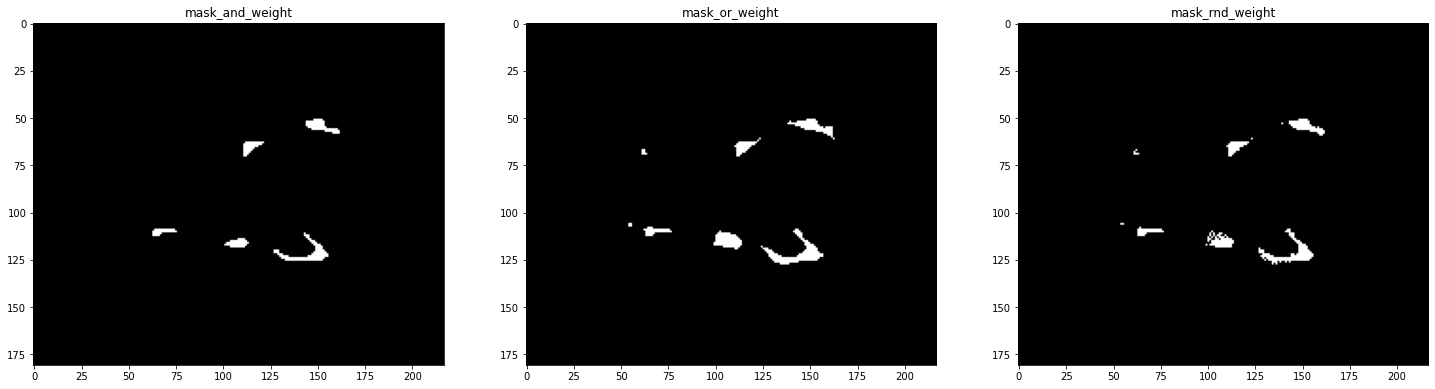

In [7]:
root = '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/'
#mask_or_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
#mask_and_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)


mask_and_weight, mask_or_weight, mask_rnd_weight = weight_ground_truth(mask1_path, mask2_path)
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.imshow(mask_and_weight[:,:,90],'gray')
plt.title('mask_and_weight')
plt.subplot(1,3,2)
plt.imshow(mask_or_weight[:,:,90],'gray')
plt.title('mask_or_weight')
plt.subplot(1,3,3)
plt.imshow(mask_rnd_weight[:,:,90],'gray')
plt.title('mask_rnd_weight')

## 3) Make the custom dataset

In [4]:
import glob

In [5]:
base_path = '/scratch/hp2173/training/'
second_path_list = ['training01/','training02/','training03/','training04/','training05/']
mri_list = []
mask1_list = []
mask2_list = []
for i in range(5):
    timepoint1_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_01_*.nii')
    timepoint2_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_02_*.nii')
    timepoint3_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_03_*.nii')
    timepoint4_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_04_*.nii')
    if i==2:
        timepoint5_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_05_*.nii')
    mask1_path = os.path.join(base_path, second_path_list[i], 'masks/*1.nii')
    mask2_path = os.path.join(base_path, second_path_list[i], 'masks/*2.nii')
    timepoint1_list = sorted(glob.glob(timepoint1_path))
    timepoint2_list = sorted(glob.glob(timepoint2_path))
    timepoint3_list = sorted(glob.glob(timepoint3_path))
    timepoint4_list = sorted(glob.glob(timepoint4_path))
    if i==2:
        timepoint5_list = sorted(glob.glob(timepoint5_path))
    mri_list.append(timepoint1_list)
    mri_list.append(timepoint2_list)
    mri_list.append(timepoint3_list)
    mri_list.append(timepoint4_list)
    if i==2:
        mri_list.append(timepoint5_list)
    mask1_list = mask1_list + sorted(glob.glob(mask1_path))
    mask2_list = mask2_list + sorted(glob.glob(mask2_path))
print('Data Collected:', len(mri_list))
print('Mask1 Collected:', len(mask1_list))
print('Mask2 Collected:', len(mask2_list))

Data Collected: 21
Mask1 Collected: 21
Mask2 Collected: 21


<ipython-input-5-bbfdd6332bd2>:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  ex = nib.load(mri_list[0][index+i]).get_data()
<ipython-input-5-bbfdd6332bd2>:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  ms1 = nib.load(mask1_list[0]).get_data()
<ipython-input-5-bbfdd6332bd2>:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dat

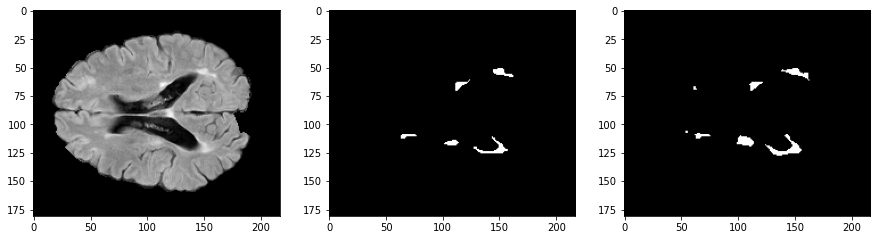

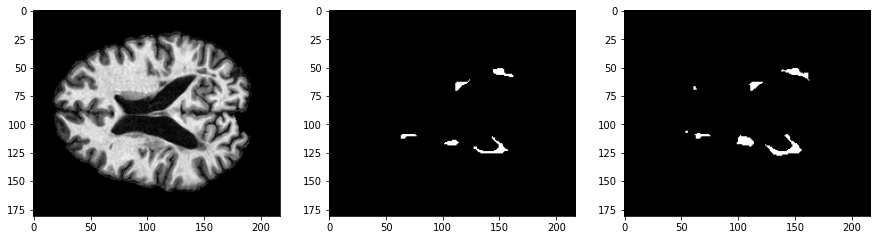

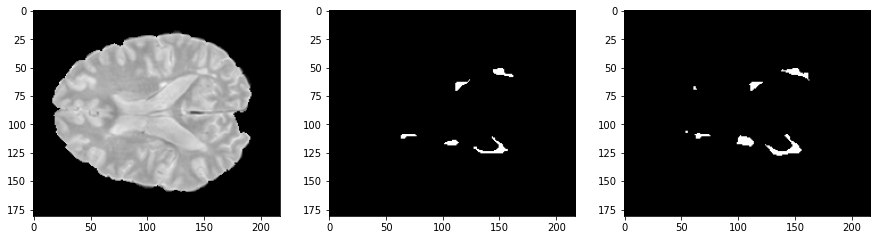

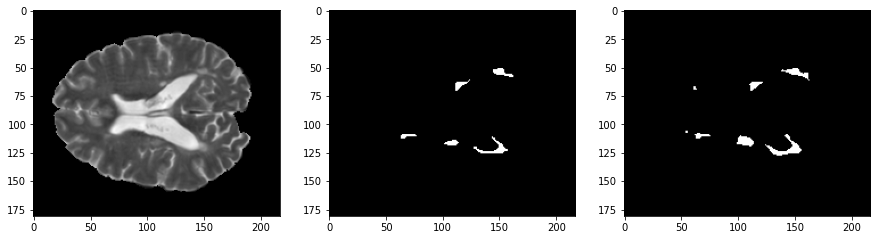

In [5]:
# 0-3:training 1(4 time points)
# 4-7:training 2(4 time points)
# 8-12:training 3(5 time points)
# 13-16:training 4(4 time points)
# 17-20:training 5(4 time points)
# order in one training set: t2_flair_weight, t1_weight, pd_weight, t2_weight

#Display one timepoint(4 type MRI) for one of the training set
index = 0
for i in range(4):
    ex = nib.load(mri_list[0][index+i]).get_data()
    ms1 = nib.load(mask1_list[0]).get_data()
    ms2 = nib.load(mask2_list[0]).get_data()
    plt.figure(figsize=(15,25))
    plt.subplot(5,3,3*i+1)
    plt.imshow(ex[:,:,90],'gray')
    plt.subplot(5,3,3*i+2)
    plt.imshow(ms1[:,:,90],'gray')
    plt.subplot(5,3,3*i+3)
    plt.imshow(ms2[:,:,90],'gray')

In [6]:
from random import shuffle
def shuffle_two_lists(listA, listB, listC):
  temp = list(zip(listA, listB, listC))
  shuffle(temp)
  return zip(*temp)
train_split_ratio = 0.8
test_split_ratio = 0.1
num_samples = len(mri_list)

train_size = int(num_samples * train_split_ratio)
test_size = int(num_samples * test_split_ratio)
val_size = num_samples - train_size - test_size
mri_list_shuffled, mask1_list_shuffled, mask2_list_shuffled = shuffle_two_lists(mri_list, mask1_list, mask2_list)

train_img_list, train_label1_list, train_label2_list = mri_list_shuffled[:train_size], mask1_list_shuffled[:train_size], mask2_list_shuffled[:train_size]
val_img_list, val_label1_list, val_label2_list = mri_list_shuffled[train_size:train_size+ val_size], mask1_list_shuffled[train_size:train_size + val_size], mask2_list_shuffled[train_size:train_size + val_size]
test_img_list, test_label1_list, test_label2_list = mri_list_shuffled[train_size+ val_size:], mask1_list_shuffled[train_size+ val_size:], mask2_list_shuffled[train_size+ val_size:]

print ("Training set size: {}". format(len(train_img_list)))
print ("Validation set size: {}". format(len(val_img_list)))
print ("Test set size: {}". format(len(test_img_list)))

Training set size: 16
Validation set size: 3
Test set size: 2


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import transforms, datasets
from torch.utils.data import Dataset
from tqdm import tqdm

class MRIDataset(Dataset):
    def __init__(self, img_path_list, label1_path_list, label2_path_list, RULE = 'and', IF_TRAIN= False):
        self.mri_path_list = img_path_list
        self.label1_path_list = label1_path_list
        self.label2_path_list = label2_path_list
        self.rule = RULE
        self.IF_TRAIN = IF_TRAIN
        #self.transform=transforms.Compose([transforms.Normalize((0.5,),(0.5,))])
        self.mri_list, self.mask1_list, self.mask2_list, self.mask_and_list, self.mask_or_list, self.mask_rnd_list = self.preprocess() 

    def __len__(self):
        return len(self.mri_list)

    def preprocess(self):
        mri_list, mask1_list, mask2_list, mask_and_list, mask_or_list, mask_rnd_list = [], [], [], [], [], []
        for idx in tqdm(range(len(self.mri_path_list))):
            mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
            mri_t2f = (mri_t2f-mri_t2f.min())/(mri_t2f.max()-mri_t2f.min())
            
            mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
            mri_t1w = (mri_t1w-mri_t1w.min())/(mri_t1w.max()-mri_t1w.min())
            
            mri_pd = torch.Tensor(nib.load(self.mri_path_list[idx][2]).get_data())
            mri_pd = (mri_pd-mri_pd.min())/(mri_pd.max()-mri_pd.min())
            
            mri_t2w = torch.Tensor(nib.load(self.mri_path_list[idx][3]).get_data())
            mri_t2w = (mri_t2w-mri_t2w.min())/(mri_t2w.max()-mri_t2w.min())
            
            mri = torch.cat((mri_t1w.unsqueeze(0),mri_t2w.unsqueeze(0),mri_pd.unsqueeze(0),mri_t2f.unsqueeze(0)),axis=0)
            #mri = self.transform(mri)
            mask_and, mask_or, mask_rnd = weight_ground_truth(self.label1_path_list[idx], self.label2_path_list[idx])
            mask1 = torch.Tensor(nib.load(self.label1_path_list[idx]).get_data())
            mask2 = torch.Tensor(nib.load(self.label2_path_list[idx]).get_data())
            
            mri_list.append(mri)
            mask1_list.append(mask1)
            mask2_list.append(mask2)
            mask_and_list.append(mask_and)
            mask_or_list.append(mask_or)
            mask_rnd_list.append(mask_rnd)
        return mri_list, mask1_list, mask2_list, mask_and_list, mask_or_list, mask_rnd_list

    def __getitem__ (self,idx):
        img = self.mri_list[idx]
        if self.rule=='and':
            mask = self.mask_and_list[idx]
        elif self.rule=='or':
            mask = self.mask_or_list[idx]
        elif self.rule=='random':
            mask = self.mask_rnd_list[idx]
        elif self.rule=='mask1':
            mask = self.mask1_list[idx]
        elif self.rule=='mask2':
            mask = self.mask2_list[idx]
            
        label = torch.Tensor(mask)

        return img, label

In [13]:
dataset = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'and', IF_TRAIN= True)

  0%|          | 0/2 [00:00<?, ?it/s]<ipython-input-12-976d5a4983b3>:25: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-12-976d5a4983b3>:28: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-12-976d5a4983b3>:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more pr

torch.Size([4, 181, 217, 181])
torch.Size([181, 217, 181])
1.0
1.0
1.0
1.0


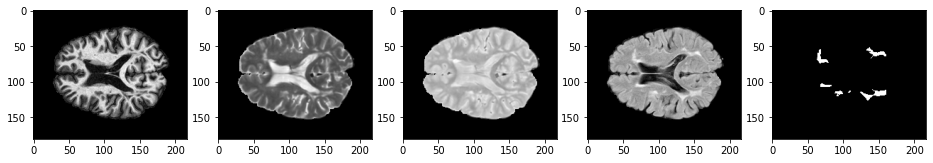

In [15]:
img, mask = dataset[0]
print(img.shape)
print(mask.shape)
plt.figure(figsize = (16,32))
plt.subplot(1,5,1)
plt.imshow(img[0,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.subplot(1,5,2)
plt.imshow(img[1,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.subplot(1,5,3)
plt.imshow(img[2,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.subplot(1,5,4)
plt.imshow(img[3,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.subplot(1,5,5)
plt.imshow(mask.cpu().numpy()[:,:,90],'gray')
print(img[0,:,:,:].cpu().numpy().max())
print(img[1,:,:,:].cpu().numpy().max())
print(img[2,:,:,:].cpu().numpy().max())
print(img[3,:,:,:].cpu().numpy().max())

In [17]:
train_dataset = MRIDataset(train_img_list, train_label1_list, train_label2_list, RULE = 'and', IF_TRAIN= True)
val_dataset = MRIDataset(val_img_list, val_label1_list, val_label2_list, RULE = 'and', IF_TRAIN= False)
test_dataset = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'and', IF_TRAIN= False)

  0%|          | 0/16 [00:00<?, ?it/s]<ipython-input-7-976d5a4983b3>:25: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-7-976d5a4983b3>:28: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-7-976d5a4983b3>:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more pred

In [18]:
NUM_EPOCH = 400
BATCH_SIZE = 4
LR = 0.0001
SAVE_PATH = "/scratch/hp2173/mri/SelfAttention_U-net_3D_model/"

In [19]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True, 
                                           num_workers=0)
val_loader = torch.utils.data.DataLoader(val_dataset, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)

# 3.Build the Network

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
class SelfAttention_3D(nn.Module):
    def __init__(self, feature_dims, dim_q):
        super(SelfAttention_3D, self).__init__()
        self.fc_q1 = nn.Linear(feature_dims, dim_q)
        self.fc_k1 = nn.Linear(feature_dims, dim_q)
        self.fc_v1 = nn.Linear(feature_dims, dim_q)
        
        self.fc_q2 = nn.Linear(feature_dims, dim_q)
        self.fc_k2 = nn.Linear(feature_dims, dim_q)
        self.fc_v2 = nn.Linear(feature_dims, dim_q)
        
        self.fc_q3 = nn.Linear(feature_dims, dim_q)
        self.fc_k3 = nn.Linear(feature_dims, dim_q)
        self.fc_v3 = nn.Linear(feature_dims, dim_q)
        
        self.fc_o = nn.Linear(3*dim_q, feature_dims)

    def forward(self, input_data):
        # Expect input_data to be of shape (batch_size, channels, l, w, h).
        batch_size, channels, l, w, h  = input_data.size()
        # (batch_size, n_pixels, channels)
        input_data = input_data.flatten().reshape(batch_size, channels, -1)

        # Linear transforms(head_1).
        queries1 = self.fc_q1(input=input_data)  # (batch_size, feature_dims, dim_q)
        keys1 = self.fc_k1(input=input_data)  # (batch_size, feature_dims, dim_q)
        values1 = self.fc_v1(input=input_data)  # (batch_size, feature_dims, dim_q)
        
        # Attention matrix1.
        dot1 = torch.bmm(queries1, keys1.transpose(1, 2))  # (batch_size, channels, channels)
        scaled_dot1 = torch.div(dot1, torch.sqrt(torch.tensor(l*w*h).float())) # scale
        atten_matrix1 = F.softmax(scaled_dot1, dim=1)
        atten_weighted1 = torch.bmm(atten_matrix1, values1)
        
        # Linear transforms(head_2).
        queries2 = self.fc_q2(input=input_data)  # (batch_size, feature_dims, dim_q)
        keys2 = self.fc_k2(input=input_data)  # (batch_size, feature_dims, dim_q)
        values2 = self.fc_v2(input=input_data)  # (batch_size, feature_dims, dim_q)
        
        # Attention matrix2.
        dot2 = torch.bmm(queries2, keys2.transpose(1, 2))  # (batch_size, channels, channels)
        scaled_dot2 = torch.div(dot2, torch.sqrt(torch.tensor(l*w*h).float())) # scale
        atten_matrix2 = F.softmax(scaled_dot2, dim=1)
        atten_weighted2 = torch.bmm(atten_matrix2, values2)
        
        # Linear transforms(head_3).
        queries3 = self.fc_q3(input=input_data)  # (batch_size, feature_dims, dim_q)
        keys3 = self.fc_k3(input=input_data)  # (batch_size, feature_dims, dim_q)
        values3 = self.fc_v3(input=input_data)  # (batch_size, feature_dims, dim_q)
        
        # Attention matrix1.
        dot3 = torch.bmm(queries3, keys3.transpose(1, 2))  # (batch_size, channels, channels)
        scaled_dot3 = torch.div(dot3, torch.sqrt(torch.tensor(l*w*h).float())) # scale
        atten_matrix3 = F.softmax(scaled_dot3, dim=1)
        atten_weighted3 = torch.bmm(atten_matrix3, values3)
        
        catlayer = torch.cat((atten_weighted1,atten_weighted2,atten_weighted3),dim=2)
        output = self.fc_o(catlayer).flatten().reshape(batch_size, channels, l, w, h)
        
        return output

In [19]:
'''feature map for each pixels
class SelfAttention_3D(nn.Module):
    def __init__(self, n_channels, dim_q):
        super(SelfAttention_3D, self).__init__()
        self.fc_q1 = nn.Linear(n_channels, dim_q)
        self.fc_k1 = nn.Linear(n_channels, dim_q)
        self.fc_v1 = nn.Linear(n_channels, dim_q)
        
        self.fc_q2 = nn.Linear(n_channels, dim_q)
        self.fc_k2 = nn.Linear(n_channels, dim_q)
        self.fc_v2 = nn.Linear(n_channels, dim_q)
        
        self.fc_q3 = nn.Linear(n_channels, dim_q)
        self.fc_k3 = nn.Linear(n_channels, dim_q)
        self.fc_v3 = nn.Linear(n_channels, dim_q)
        
        self.fc_o = nn.Linear(3*dim_q, n_channels)

    def forward(self, input_data):
        # Expect input_data to be of shape (batch_size, channels, l, w, h).
        batch_size, channels, l, w, h  = input_data.size()
        # (batch_size, n_pixels, channels)
        input_data = input_data.flatten().reshape(batch_size, -1, channels)

        # Linear transforms(head_1).
        queries1 = self.fc_q1(input=input_data)  # (batch_size, n_pixels, dim_q)
        keys1 = self.fc_k1(input=input_data)  # (batch_size, n_pixels, dim_q)
        values1 = self.fc_v1(input=input_data)  # (batch_size, n_pixels, dim_q)
        
        # Attention matrix1.
        dot1 = torch.bmm(queries1, keys1.transpose(1, 2))  # (batch_size, n_pixels, n_pixels)
        scaled_dot1 = torch.div(dot1, torch.sqrt(torch.tensor(channels).float())) # scale
        atten_matrix1 = F.softmax(scaled_dot1, dim=1)
        atten_weighted1 = torch.bmm(atten_matrix1, values1)
        
        # Linear transforms(head_2).
        queries2 = self.fc_q2(input=input_data)  # (batch_size, n_pixels, dim_q)
        keys2 = self.fc_k2(input=input_data)  # (batch_size, n_pixels, dim_q)
        values2 = self.fc_v2(input=input_data)  # (batch_size, n_pixels, dim_q)
        
        # Attention matrix2.
        dot2 = torch.bmm(queries2, keys2.transpose(1, 2))  # (batch_size, n_pixels, n_pixels)
        scaled_dot2 = torch.div(dot2, torch.sqrt(torch.tensor(channels).float())) # scale
        atten_matrix2 = F.softmax(scaled_dot2, dim=1)
        atten_weighted2 = torch.bmm(atten_matrix2, values2)
        
        # Linear transforms(head_3).
        queries3 = self.fc_q3(input=input_data)  # (batch_size, n_pixels, dim_q)
        keys3 = self.fc_k3(input=input_data)  # (batch_size, n_pixels, dim_q)
        values3 = self.fc_v3(input=input_data)  # (batch_size, n_pixels, dim_q)
        
        # Attention matrix1.
        dot3 = torch.bmm(queries3, keys3.transpose(1, 2))  # (batch_size, n_pixels, n_pixels)
        scaled_dot3 = torch.div(dot3, torch.sqrt(torch.tensor(channels).float())) # scale
        atten_matrix3 = F.softmax(scaled_dot3, dim=1)
        atten_weighted3 = torch.bmm(atten_matrix3, values3)
        
        catlayer = torch.cat((atten_weighted1,atten_weighted2,atten_weighted3),dim=2)
        output = self.fc_o(catlayer).permute(0,2,1).flatten().reshape(batch_size, channels, l, w, h)
        
        return output
'''

'feature map for each pixels\nclass SelfAttention_3D(nn.Module):\n    def __init__(self, n_channels, dim_q):\n        super(SelfAttention_3D, self).__init__()\n        self.fc_q1 = nn.Linear(n_channels, dim_q)\n        self.fc_k1 = nn.Linear(n_channels, dim_q)\n        self.fc_v1 = nn.Linear(n_channels, dim_q)\n        \n        self.fc_q2 = nn.Linear(n_channels, dim_q)\n        self.fc_k2 = nn.Linear(n_channels, dim_q)\n        self.fc_v2 = nn.Linear(n_channels, dim_q)\n        \n        self.fc_q3 = nn.Linear(n_channels, dim_q)\n        self.fc_k3 = nn.Linear(n_channels, dim_q)\n        self.fc_v3 = nn.Linear(n_channels, dim_q)\n        \n        self.fc_o = nn.Linear(3*dim_q, n_channels)\n\n    def forward(self, input_data):\n        # Expect input_data to be of shape (batch_size, channels, l, w, h).\n        batch_size, channels, l, w, h  = input_data.size()\n        # (batch_size, n_pixels, channels)\n        input_data = input_data.flatten().reshape(batch_size, -1, channels)\n\n 

In [20]:
net = SelfAttention_3D(1000, 10)
a = torch.zeros(4, 90, 10, 10, 10)
b = net(a)
print(a.shape)
print(b.shape)

torch.Size([4, 90, 10, 10, 10])
torch.Size([4, 90, 10, 10, 10])


In [10]:
class SelfAttention_UNet(nn.Module):


    def __init__(self, in_channels, n_classes, base_n_filter=8):
        super(SelfAttention_UNet, self).__init__()
        self.in_channels = in_channels
        self.n_classes = n_classes
        self.base_n_filter = base_n_filter

        self.lrelu = nn.LeakyReLU()
        self.dropout3d = nn.Dropout3d(p=0.6)
        self.upsacle = nn.Upsample(scale_factor=2, mode='nearest')
        self.softmax = nn.Softmax(dim=1)

        self.conv3d_c1_1 = nn.Conv3d(self.in_channels, self.base_n_filter, kernel_size=3, stride=1, padding=1,bias=False)
        self.conv3d_c1_2 = nn.Conv3d(self.base_n_filter, self.base_n_filter, kernel_size=3, stride=1, padding=1,bias=False)
        self.lrelu_conv_c1 = self.lrelu_conv(self.base_n_filter, self.base_n_filter)
        self.inorm3d_c1 = nn.InstanceNorm3d(self.base_n_filter)

        self.conv3d_c2 = nn.Conv3d(self.base_n_filter, self.base_n_filter * 2, kernel_size=3, stride=2, padding=1,bias=False)
        self.norm_lrelu_conv_c2 = self.norm_lrelu_conv(self.base_n_filter * 2, self.base_n_filter * 2)
        self.inorm3d_c2 = nn.InstanceNorm3d(self.base_n_filter * 2)

        self.conv3d_c3 = nn.Conv3d(self.base_n_filter * 2, self.base_n_filter * 4, kernel_size=3, stride=2, padding=1,bias=False)
        self.norm_lrelu_conv_c3 = self.norm_lrelu_conv(self.base_n_filter * 4, self.base_n_filter * 4)
        self.inorm3d_c3 = nn.InstanceNorm3d(self.base_n_filter * 4)

        self.conv3d_c4 = nn.Conv3d(self.base_n_filter * 4, self.base_n_filter * 8, kernel_size=3, stride=2, padding=1,bias=False)
        self.norm_lrelu_conv_c4 = self.norm_lrelu_conv(self.base_n_filter * 8, self.base_n_filter * 8)
        self.inorm3d_c4 = nn.InstanceNorm3d(self.base_n_filter * 8)

        self.conv3d_c5 = nn.Conv3d(self.base_n_filter * 8, self.base_n_filter * 16, kernel_size=3, stride=2, padding=1,bias=False)
        self.norm_lrelu_conv_c5 = self.norm_lrelu_conv(self.base_n_filter * 16, self.base_n_filter * 16)
        self.norm_lrelu_upscale_conv_norm_lrelu_l0 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 16, self.base_n_filter * 8)

        self.conv3d_l0 = nn.Conv3d(self.base_n_filter * 8, self.base_n_filter * 8, kernel_size=1, stride=1, padding=0,bias=False)
        self.inorm3d_l0 = nn.InstanceNorm3d(self.base_n_filter * 8)

        self.conv_norm_lrelu_l1 = self.conv_norm_lrelu(self.base_n_filter * 16, self.base_n_filter * 16)
        self.conv3d_l1 = nn.Conv3d(self.base_n_filter * 16, self.base_n_filter * 8, kernel_size=1, stride=1, padding=0, bias=False)
        self.norm_lrelu_upscale_conv_norm_lrelu_l1 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 8,self.base_n_filter * 4)

        self.conv_norm_lrelu_l2 = self.conv_norm_lrelu(self.base_n_filter * 8, self.base_n_filter * 8)
        self.conv3d_l2 = nn.Conv3d(self.base_n_filter * 8, self.base_n_filter * 4, kernel_size=1, stride=1, padding=0,bias=False)
        self.norm_lrelu_upscale_conv_norm_lrelu_l2 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 4,self.base_n_filter * 2)

        self.conv_norm_lrelu_l3 = self.conv_norm_lrelu(self.base_n_filter * 4, self.base_n_filter * 4)
        self.conv3d_l3 = nn.Conv3d(self.base_n_filter * 4, self.base_n_filter * 2, kernel_size=1, stride=1, padding=0,bias=False)
        self.norm_lrelu_upscale_conv_norm_lrelu_l3 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 2,self.base_n_filter)

        self.conv_norm_lrelu_l4 = self.conv_norm_lrelu(self.base_n_filter * 2, self.base_n_filter * 2)
        self.conv3d_l4 = nn.Conv3d(self.base_n_filter * 2, self.n_classes, kernel_size=1, stride=1, padding=0,bias=False)

        self.ds2_1x1_conv3d = nn.Conv3d(self.base_n_filter * 8, self.n_classes, kernel_size=1, stride=1, padding=0,bias=False)
        self.ds3_1x1_conv3d = nn.Conv3d(self.base_n_filter * 4, self.n_classes, kernel_size=1, stride=1, padding=0,bias=False)
        self.sigmoid = nn.Sigmoid()
        
        self.attention1 = SelfAttention_3D(feature_dims=23*28*23, dim_q=10)
        self.attention2 = SelfAttention_3D(feature_dims=46*55*46, dim_q=10)
        self.attention3 = SelfAttention_3D(feature_dims=91*109*91, dim_q=10)
        #self.attention4 = SelfAttention_3D(feature_dims=181*217*181, dim_q=10)

    def conv_norm_lrelu(self, feat_in, feat_out):
        return nn.Sequential(
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm3d(feat_out),
            nn.LeakyReLU())

    def norm_lrelu_conv(self, feat_in, feat_out):
        return nn.Sequential(
            nn.InstanceNorm3d(feat_in),
            nn.LeakyReLU(),
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False))

    def lrelu_conv(self, feat_in, feat_out):
        return nn.Sequential(
            nn.LeakyReLU(),
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False))

    def norm_lrelu_upscale_conv_norm_lrelu(self, feat_in, feat_out):
        return nn.Sequential(
            nn.InstanceNorm3d(feat_in),
            nn.LeakyReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            # should be feat_in*2 or feat_in
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm3d(feat_out),
            nn.LeakyReLU())

    def forward(self, x):
        #  Level 1 context pathway
        out = self.conv3d_c1_1(x)
        residual_1 = out
        out = self.lrelu(out)
        out = self.conv3d_c1_2(out)
        out = self.dropout3d(out)
        out = self.lrelu_conv_c1(out)
        # Element Wise Summation
        out += residual_1
        context_1 = self.lrelu(out)
        out = self.inorm3d_c1(out)
        out = self.lrelu(out)

        # Level 2 context pathway
        out = self.conv3d_c2(out)
        residual_2 = out
        out = self.norm_lrelu_conv_c2(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c2(out)
        out += residual_2
        out = self.inorm3d_c2(out)
        out = self.lrelu(out)
        context_2 = out

        # Level 3 context pathway
        out = self.conv3d_c3(out)
        residual_3 = out
        out = self.norm_lrelu_conv_c3(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c3(out)
        out += residual_3
        out = self.inorm3d_c3(out)
        out = self.lrelu(out)
        context_3 = out

        # Level 4 context pathway
        out = self.conv3d_c4(out)
        residual_4 = out
        out = self.norm_lrelu_conv_c4(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c4(out)
        out += residual_4
        out = self.inorm3d_c4(out)
        out = self.lrelu(out)
        context_4 = out

        # Level 5
        out = self.conv3d_c5(out)
        residual_5 = out
        out = self.norm_lrelu_conv_c5(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c5(out)
        out += residual_5
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l0(out)

        out = self.conv3d_l0(out)
        out = self.inorm3d_l0(out)
        out = self.lrelu(out)

        # Level 1 localization pathway
        out = out[:,:,0:-1,:,0:-1]
        out = torch.cat([out, context_4], dim=1)
        out = self.attention1(out)
        out = self.conv_norm_lrelu_l1(out)
        out = self.conv3d_l1(out)
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l1(out)

        # Level 2 localization pathway
        out = out[:,:,:,0:-1,:]
        out = torch.cat([out, context_3], dim=1)
        out = self.attention2(out)
        out = self.conv_norm_lrelu_l2(out)
        ds2 = out
        out = self.conv3d_l2(out)
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l2(out)

        # Level 3 localization pathway
        out = out[:,:,0:-1,0:-1,0:-1]
        out = torch.cat([out, context_2], dim=1)
        out = self.attention3(out)
        out = self.conv_norm_lrelu_l3(out)
        ds3 = out
        out = self.conv3d_l3(out)
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l3(out)

        # Level 4 localization pathway
        out = out[:,:,0:-1,0:-1,0:-1]
        out = torch.cat([out, context_1], dim=1)
        #out = self.attention4(out)
        out = self.conv_norm_lrelu_l4(out)
        out_pred = self.conv3d_l4(out)

        ds2_1x1_conv = self.ds2_1x1_conv3d(ds2)
        ds1_ds2_sum_upscale = self.upsacle(ds2_1x1_conv)
        ds3_1x1_conv = self.ds3_1x1_conv3d(ds3)
        ds1_ds2_sum_upscale = ds1_ds2_sum_upscale[:,:,0:-1,0:-1,0:-1]
        ds1_ds2_sum_upscale_ds3_sum = ds1_ds2_sum_upscale + ds3_1x1_conv
        ds1_ds2_sum_upscale_ds3_sum_upscale = self.upsacle(ds1_ds2_sum_upscale_ds3_sum)
        
        ds1_ds2_sum_upscale_ds3_sum_upscale = ds1_ds2_sum_upscale_ds3_sum_upscale[:,:,0:-1,0:-1,0:-1]
        out = out_pred + ds1_ds2_sum_upscale_ds3_sum_upscale
        seg_layer = out
        return seg_layer

In [22]:
net = SelfAttention_UNet(4,1).to(device)
a = torch.zeros(1, 4, 181, 217, 181).to(device)
b = net(a)
print(a.shape)
print(b.shape)

torch.Size([1, 4, 181, 217, 181])
torch.Size([1, 1, 181, 217, 181])


# 4.Dice Loss

In [11]:
# define dice coefficient
def dice_coeff(pred, target):
    smooth = 1
    # First let's flatten the matrix to [Batch Size, -1]
    # The flatten operation does not afftect the computation of the above equation
    num = pred.size(0)
    m1 = pred. view(num, -1). float() # Flatten
    m2 = target. view(num, -1). float() # Flatten
    # Then we compute the intersection and the sum of cardinality
    intersection = 2*torch.sum(m1*m2,dim= 1) + smooth
    cardinality = torch.sum(m1**2,dim= 1) + torch.sum(m2**2,dim= 1) + smooth
    # Followed by Dice
    dice = intersection/cardinality
    return dice.mean()
# define SoftDICE loss as 1 - SoftDICE
class SoftDICELoss(nn. Module):
    def __init__(self, smooth = 1):
        super(SoftDICELoss, self). __init__()
        self. smooth = smooth
    def forward(self, pred, target):
        loss = 1 - dice_coeff(pred, target)
        return loss.mean()

# 5.Training

In [12]:
def train_epoch(net, data_loader, optimizer, criterion, epoch):

    net = net.train()
    optimizer.zero_grad()
    loss_stat = []
    for i, img_mask in enumerate(data_loader):
        img, mask = img_mask

        img = img.to(device)
        mask = mask.to(device)

        pred = net(img)

        loss = criterion(pred, mask)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_stat += [loss.item()]*img.shape[0]
        print ("Epoch {}: [{}/{}] Loss: {:.3f}". format(epoch, len(data_loader), len(data_loader),np. mean(loss_stat)))
    return np.mean(loss_stat)

In [13]:
def eval_epoch(net, data_loader, metric, criterion):
    # set model in eval mode to avoid updating BN layer
    net = net.eval()
    
    metric_stat = []
    val_loss_stat = []
    for i, img_mask in enumerate(data_loader):
        img, mask = img_mask
        # send data to device
        img = img.to(device)
        mask = mask.to(device)
        # feed data to the model. No need to compute grad.
        with torch.no_grad():
            pred = net(img)
            val_loss = criterion(pred, mask)
            
        # eval the results using DICE function as the metric
        # Convert probability to prediction mask
        pred = pred>0.4
        err = dice_coeff(pred, mask)
        metric_stat += [err.item()]*img.shape[0]
        val_loss_stat += [val_loss.item()]*img.shape[0]
        
    print ("Dice: {:.3f}  Val Loss: {:.3f} ".format(np.mean(metric_stat), np.mean(val_loss_stat)))
    
    return np.mean(val_loss_stat), np.mean(metric_stat)

In [26]:
net = SelfAttention_UNet(4,1).to(device)
print(net)
n_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print('Number of parameters in network: ', n_params)

SelfAttention_UNet(
  (lrelu): LeakyReLU(negative_slope=0.01)
  (dropout3d): Dropout3d(p=0.6, inplace=False)
  (upsacle): Upsample(scale_factor=2.0, mode=nearest)
  (softmax): Softmax(dim=1)
  (conv3d_c1_1): Conv3d(4, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (conv3d_c1_2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (lrelu_conv_c1): Sequential(
    (0): LeakyReLU(negative_slope=0.01)
    (1): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  )
  (inorm3d_c1): InstanceNorm3d(8, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (conv3d_c2): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (norm_lrelu_conv_c2): Sequential(
    (0): InstanceNorm3d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), 

In [27]:
optimizer = optim.Adam(net.parameters(), lr= LR)
criterion = SoftDICELoss()

train_loss_list = []
val_loss_list = []

In [28]:
for epoch in range(NUM_EPOCH):    
    loss = train_epoch(net, train_loader, optimizer, criterion, epoch)
    val_loss, dice = eval_epoch(net, val_loader, dice_coeff, criterion)
    
    # Record losses for each epoch
    train_loss_list.append(loss)
    val_loss_list.append(val_loss)
    
    # Save the model after each epoch
    if os.path.isdir(SAVE_PATH):
        torch.save(net.state_dict(),SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1))
    else:
        os.makedirs(SAVE_PATH, exist_ok=True)
        torch.save(net.state_dict(),SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1))
    print('Checkpoint {} saved to {}'.format(epoch + 1, SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1)))  

Epoch 0: [4/4] Loss: 0.999
Epoch 0: [4/4] Loss: 0.999
Epoch 0: [4/4] Loss: 0.999
Epoch 0: [4/4] Loss: 0.999
Dice: 0.006  Val Loss: 0.995 
Checkpoint 1 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch1.pth
Epoch 1: [4/4] Loss: 0.997
Epoch 1: [4/4] Loss: 0.997
Epoch 1: [4/4] Loss: 0.997
Epoch 1: [4/4] Loss: 0.998
Dice: 0.008  Val Loss: 0.992 
Checkpoint 2 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch2.pth
Epoch 2: [4/4] Loss: 0.997
Epoch 2: [4/4] Loss: 0.995
Epoch 2: [4/4] Loss: 0.996
Epoch 2: [4/4] Loss: 0.996
Dice: 0.009  Val Loss: 0.989 
Checkpoint 3 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch3.pth
Epoch 3: [4/4] Loss: 0.997
Epoch 3: [4/4] Loss: 0.997
Epoch 3: [4/4] Loss: 0.996
Epoch 3: [4/4] Loss: 0.995
Dice: 0.011  Val Loss: 0.986 
Checkpoint 4 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch4.pth
Epoch 4: [4/4] Loss: 0.991
Epoch 4: [4/4] Loss: 0.994
Epoch 4: [4/4] Loss: 0.994
Epoch 4: [4/4] 

Checkpoint 36 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch36.pth
Epoch 36: [4/4] Loss: 0.652
Epoch 36: [4/4] Loss: 0.636
Epoch 36: [4/4] Loss: 0.646
Epoch 36: [4/4] Loss: 0.673
Dice: 0.531  Val Loss: 0.536 
Checkpoint 37 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch37.pth
Epoch 37: [4/4] Loss: 0.710
Epoch 37: [4/4] Loss: 0.651
Epoch 37: [4/4] Loss: 0.670
Epoch 37: [4/4] Loss: 0.650
Dice: 0.528  Val Loss: 0.531 
Checkpoint 38 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch38.pth
Epoch 38: [4/4] Loss: 0.680
Epoch 38: [4/4] Loss: 0.675
Epoch 38: [4/4] Loss: 0.650
Epoch 38: [4/4] Loss: 0.635
Dice: 0.524  Val Loss: 0.510 
Checkpoint 39 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch39.pth
Epoch 39: [4/4] Loss: 0.556
Epoch 39: [4/4] Loss: 0.640
Epoch 39: [4/4] Loss: 0.644
Epoch 39: [4/4] Loss: 0.636
Dice: 0.527  Val Loss: 0.512 
Checkpoint 40 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/

Epoch 71: [4/4] Loss: 0.445
Epoch 71: [4/4] Loss: 0.455
Epoch 71: [4/4] Loss: 0.411
Epoch 71: [4/4] Loss: 0.422
Dice: 0.597  Val Loss: 0.398 
Checkpoint 72 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch72.pth
Epoch 72: [4/4] Loss: 0.441
Epoch 72: [4/4] Loss: 0.447
Epoch 72: [4/4] Loss: 0.435
Epoch 72: [4/4] Loss: 0.435
Dice: 0.600  Val Loss: 0.399 
Checkpoint 73 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch73.pth
Epoch 73: [4/4] Loss: 0.491
Epoch 73: [4/4] Loss: 0.458
Epoch 73: [4/4] Loss: 0.435
Epoch 73: [4/4] Loss: 0.430
Dice: 0.595  Val Loss: 0.399 
Checkpoint 74 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch74.pth
Epoch 74: [4/4] Loss: 0.462
Epoch 74: [4/4] Loss: 0.420
Epoch 74: [4/4] Loss: 0.440
Epoch 74: [4/4] Loss: 0.423
Dice: 0.598  Val Loss: 0.393 
Checkpoint 75 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch75.pth
Epoch 75: [4/4] Loss: 0.538
Epoch 75: [4/4] Loss: 0.446
Epoch 75: [4/4] 

Epoch 106: [4/4] Loss: 0.344
Epoch 106: [4/4] Loss: 0.346
Dice: 0.625  Val Loss: 0.344 
Checkpoint 107 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch107.pth
Epoch 107: [4/4] Loss: 0.313
Epoch 107: [4/4] Loss: 0.328
Epoch 107: [4/4] Loss: 0.325
Epoch 107: [4/4] Loss: 0.346
Dice: 0.626  Val Loss: 0.342 
Checkpoint 108 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch108.pth
Epoch 108: [4/4] Loss: 0.359
Epoch 108: [4/4] Loss: 0.372
Epoch 108: [4/4] Loss: 0.389
Epoch 108: [4/4] Loss: 0.380
Dice: 0.628  Val Loss: 0.347 
Checkpoint 109 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch109.pth
Epoch 109: [4/4] Loss: 0.391
Epoch 109: [4/4] Loss: 0.350
Epoch 109: [4/4] Loss: 0.364
Epoch 109: [4/4] Loss: 0.361
Dice: 0.630  Val Loss: 0.355 
Checkpoint 110 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch110.pth
Epoch 110: [4/4] Loss: 0.436
Epoch 110: [4/4] Loss: 0.404
Epoch 110: [4/4] Loss: 0.392
Epoch 110: [4/4] Lo

Epoch 141: [4/4] Loss: 0.370
Epoch 141: [4/4] Loss: 0.341
Epoch 141: [4/4] Loss: 0.322
Epoch 141: [4/4] Loss: 0.325
Dice: 0.642  Val Loss: 0.326 
Checkpoint 142 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch142.pth
Epoch 142: [4/4] Loss: 0.335
Epoch 142: [4/4] Loss: 0.323
Epoch 142: [4/4] Loss: 0.326
Epoch 142: [4/4] Loss: 0.337
Dice: 0.640  Val Loss: 0.329 
Checkpoint 143 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch143.pth
Epoch 143: [4/4] Loss: 0.304
Epoch 143: [4/4] Loss: 0.319
Epoch 143: [4/4] Loss: 0.327
Epoch 143: [4/4] Loss: 0.341
Dice: 0.641  Val Loss: 0.325 
Checkpoint 144 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch144.pth
Epoch 144: [4/4] Loss: 0.303
Epoch 144: [4/4] Loss: 0.334
Epoch 144: [4/4] Loss: 0.323
Epoch 144: [4/4] Loss: 0.328
Dice: 0.641  Val Loss: 0.327 
Checkpoint 145 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch145.pth
Epoch 145: [4/4] Loss: 0.269
Epoch 145: [4/4] Lo

Dice: 0.671  Val Loss: 0.299 
Checkpoint 176 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch176.pth
Epoch 176: [4/4] Loss: 0.309
Epoch 176: [4/4] Loss: 0.286
Epoch 176: [4/4] Loss: 0.312
Epoch 176: [4/4] Loss: 0.310
Dice: 0.668  Val Loss: 0.305 
Checkpoint 177 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch177.pth
Epoch 177: [4/4] Loss: 0.309
Epoch 177: [4/4] Loss: 0.308
Epoch 177: [4/4] Loss: 0.296
Epoch 177: [4/4] Loss: 0.294
Dice: 0.663  Val Loss: 0.307 
Checkpoint 178 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch178.pth
Epoch 178: [4/4] Loss: 0.348
Epoch 178: [4/4] Loss: 0.315
Epoch 178: [4/4] Loss: 0.297
Epoch 178: [4/4] Loss: 0.299
Dice: 0.669  Val Loss: 0.302 
Checkpoint 179 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch179.pth
Epoch 179: [4/4] Loss: 0.270
Epoch 179: [4/4] Loss: 0.301
Epoch 179: [4/4] Loss: 0.315
Epoch 179: [4/4] Loss: 0.315
Dice: 0.668  Val Loss: 0.312 
Checkpoint 180 sav

Epoch 210: [4/4] Loss: 0.330
Epoch 210: [4/4] Loss: 0.308
Epoch 210: [4/4] Loss: 0.290
Epoch 210: [4/4] Loss: 0.289
Dice: 0.684  Val Loss: 0.296 
Checkpoint 211 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch211.pth
Epoch 211: [4/4] Loss: 0.307
Epoch 211: [4/4] Loss: 0.291
Epoch 211: [4/4] Loss: 0.289
Epoch 211: [4/4] Loss: 0.284
Dice: 0.683  Val Loss: 0.301 
Checkpoint 212 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch212.pth
Epoch 212: [4/4] Loss: 0.302
Epoch 212: [4/4] Loss: 0.307
Epoch 212: [4/4] Loss: 0.289
Epoch 212: [4/4] Loss: 0.288
Dice: 0.679  Val Loss: 0.305 
Checkpoint 213 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch213.pth
Epoch 213: [4/4] Loss: 0.287
Epoch 213: [4/4] Loss: 0.306
Epoch 213: [4/4] Loss: 0.295
Epoch 213: [4/4] Loss: 0.281
Dice: 0.686  Val Loss: 0.298 
Checkpoint 214 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch214.pth
Epoch 214: [4/4] Loss: 0.269
Epoch 214: [4/4] Lo

Dice: 0.712  Val Loss: 0.288 
Checkpoint 245 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch245.pth
Epoch 245: [4/4] Loss: 0.250
Epoch 245: [4/4] Loss: 0.286
Epoch 245: [4/4] Loss: 0.293
Epoch 245: [4/4] Loss: 0.294
Dice: 0.715  Val Loss: 0.275 
Checkpoint 246 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch246.pth
Epoch 246: [4/4] Loss: 0.264
Epoch 246: [4/4] Loss: 0.288
Epoch 246: [4/4] Loss: 0.278
Epoch 246: [4/4] Loss: 0.290
Dice: 0.714  Val Loss: 0.276 
Checkpoint 247 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch247.pth
Epoch 247: [4/4] Loss: 0.301
Epoch 247: [4/4] Loss: 0.292
Epoch 247: [4/4] Loss: 0.285
Epoch 247: [4/4] Loss: 0.270
Dice: 0.710  Val Loss: 0.283 
Checkpoint 248 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch248.pth
Epoch 248: [4/4] Loss: 0.257
Epoch 248: [4/4] Loss: 0.248
Epoch 248: [4/4] Loss: 0.277
Epoch 248: [4/4] Loss: 0.271
Dice: 0.713  Val Loss: 0.278 
Checkpoint 249 sav

Epoch 279: [4/4] Loss: 0.288
Epoch 279: [4/4] Loss: 0.315
Epoch 279: [4/4] Loss: 0.296
Epoch 279: [4/4] Loss: 0.300
Dice: 0.747  Val Loss: 0.257 
Checkpoint 280 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch280.pth
Epoch 280: [4/4] Loss: 0.252
Epoch 280: [4/4] Loss: 0.278
Epoch 280: [4/4] Loss: 0.266
Epoch 280: [4/4] Loss: 0.285
Dice: 0.750  Val Loss: 0.255 
Checkpoint 281 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch281.pth
Epoch 281: [4/4] Loss: 0.343
Epoch 281: [4/4] Loss: 0.333
Epoch 281: [4/4] Loss: 0.306
Epoch 281: [4/4] Loss: 0.305
Dice: 0.754  Val Loss: 0.245 
Checkpoint 282 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch282.pth
Epoch 282: [4/4] Loss: 0.306
Epoch 282: [4/4] Loss: 0.332
Epoch 282: [4/4] Loss: 0.305
Epoch 282: [4/4] Loss: 0.293
Dice: 0.754  Val Loss: 0.248 
Checkpoint 283 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch283.pth
Epoch 283: [4/4] Loss: 0.263
Epoch 283: [4/4] Lo

Dice: 0.774  Val Loss: 0.206 
Checkpoint 314 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch314.pth
Epoch 314: [4/4] Loss: 0.220
Epoch 314: [4/4] Loss: 0.211
Epoch 314: [4/4] Loss: 0.209
Epoch 314: [4/4] Loss: 0.204
Dice: 0.774  Val Loss: 0.206 
Checkpoint 315 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch315.pth
Epoch 315: [4/4] Loss: 0.188
Epoch 315: [4/4] Loss: 0.189
Epoch 315: [4/4] Loss: 0.196
Epoch 315: [4/4] Loss: 0.209
Dice: 0.776  Val Loss: 0.206 
Checkpoint 316 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch316.pth
Epoch 316: [4/4] Loss: 0.236
Epoch 316: [4/4] Loss: 0.241
Epoch 316: [4/4] Loss: 0.221
Epoch 316: [4/4] Loss: 0.215
Dice: 0.776  Val Loss: 0.203 
Checkpoint 317 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch317.pth
Epoch 317: [4/4] Loss: 0.190
Epoch 317: [4/4] Loss: 0.217
Epoch 317: [4/4] Loss: 0.223
Epoch 317: [4/4] Loss: 0.213
Dice: 0.775  Val Loss: 0.210 
Checkpoint 318 sav

Epoch 348: [4/4] Loss: 0.182
Epoch 348: [4/4] Loss: 0.179
Epoch 348: [4/4] Loss: 0.173
Epoch 348: [4/4] Loss: 0.180
Dice: 0.787  Val Loss: 0.188 
Checkpoint 349 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch349.pth
Epoch 349: [4/4] Loss: 0.172
Epoch 349: [4/4] Loss: 0.191
Epoch 349: [4/4] Loss: 0.182
Epoch 349: [4/4] Loss: 0.180
Dice: 0.781  Val Loss: 0.186 
Checkpoint 350 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch350.pth
Epoch 350: [4/4] Loss: 0.157
Epoch 350: [4/4] Loss: 0.171
Epoch 350: [4/4] Loss: 0.177
Epoch 350: [4/4] Loss: 0.178
Dice: 0.788  Val Loss: 0.186 
Checkpoint 351 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch351.pth
Epoch 351: [4/4] Loss: 0.202
Epoch 351: [4/4] Loss: 0.183
Epoch 351: [4/4] Loss: 0.181
Epoch 351: [4/4] Loss: 0.176
Dice: 0.790  Val Loss: 0.184 
Checkpoint 352 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch352.pth
Epoch 352: [4/4] Loss: 0.164
Epoch 352: [4/4] Lo

Dice: 0.781  Val Loss: 0.181 
Checkpoint 383 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch383.pth
Epoch 383: [4/4] Loss: 0.168
Epoch 383: [4/4] Loss: 0.162
Epoch 383: [4/4] Loss: 0.165
Epoch 383: [4/4] Loss: 0.168
Dice: 0.787  Val Loss: 0.187 
Checkpoint 384 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch384.pth
Epoch 384: [4/4] Loss: 0.157
Epoch 384: [4/4] Loss: 0.167
Epoch 384: [4/4] Loss: 0.173
Epoch 384: [4/4] Loss: 0.180
Dice: 0.787  Val Loss: 0.182 
Checkpoint 385 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch385.pth
Epoch 385: [4/4] Loss: 0.175
Epoch 385: [4/4] Loss: 0.200
Epoch 385: [4/4] Loss: 0.191
Epoch 385: [4/4] Loss: 0.192
Dice: 0.791  Val Loss: 0.183 
Checkpoint 386 saved to /scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch386.pth
Epoch 386: [4/4] Loss: 0.188
Epoch 386: [4/4] Loss: 0.197
Epoch 386: [4/4] Loss: 0.190
Epoch 386: [4/4] Loss: 0.197
Dice: 0.795  Val Loss: 0.189 
Checkpoint 387 sav

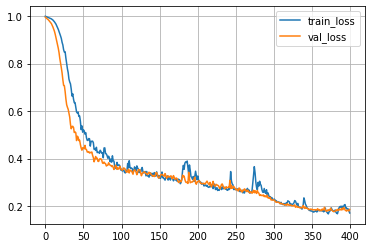

In [29]:
# Plot training loss and validation loss
plt.grid('on')
plt.plot(np.arange(NUM_EPOCH),train_loss_list,label='train_loss')
plt.plot(np.arange(NUM_EPOCH),val_loss_list, label='val_loss')
plt.legend()

# 6.Test

## Reload the model

In [22]:
checkpoint_path = '/scratch/hp2173/mri/SelfAttention_U-net_3D_model/MRISegEpoch400.pth'
net = SelfAttention_UNet(4,1).to(device)
net.load_state_dict(torch.load(checkpoint_path))
net.eval()

SelfAttention_UNet(
  (lrelu): LeakyReLU(negative_slope=0.01)
  (dropout3d): Dropout3d(p=0.6, inplace=False)
  (upsacle): Upsample(scale_factor=2.0, mode=nearest)
  (softmax): Softmax(dim=1)
  (conv3d_c1_1): Conv3d(4, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (conv3d_c1_2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (lrelu_conv_c1): Sequential(
    (0): LeakyReLU(negative_slope=0.01)
    (1): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  )
  (inorm3d_c1): InstanceNorm3d(8, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (conv3d_c2): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (norm_lrelu_conv_c2): Sequential(
    (0): InstanceNorm3d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), 

## Reload the data with mask1 and mask2

In [31]:
test_dataset_mask1 = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'mask1', IF_TRAIN= False)
test_dataset_mask2 = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'mask2', IF_TRAIN= False)

  0%|          | 0/2 [00:00<?, ?it/s]<ipython-input-7-976d5a4983b3>:25: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-7-976d5a4983b3>:28: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-7-976d5a4983b3>:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predi

In [32]:
test_loader_mask1 = torch.utils.data.DataLoader(test_dataset_mask1, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)
test_loader_mask2 = torch.utils.data.DataLoader(test_dataset_mask2, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)

## Test with mask1 and mask2

In [33]:
test_loss, test_dice = eval_epoch(net, test_loader_mask1, dice_coeff, criterion)
test_loss, test_dice = eval_epoch(net, test_loader_mask2, dice_coeff, criterion)

Dice: 0.720  Val Loss: 0.286 
Dice: 0.699  Val Loss: 0.302 


## Dispaly the output mask

In [34]:
img, mask1 = test_dataset_mask1[0]
img, mask2 = test_dataset_mask2[0]
result = net(img.unsqueeze(0).to(device)).detach()
mask_pred = result.cpu().numpy()[0,0,:,:,:]
mask_pred[mask_pred>0.3] = 1
mask_pred[mask_pred<=0.3] = 0
print(mask_pred.shape)

(181, 217, 181)


Manual Volume for mask1: 31494.0
Manual Volume for mask2: 34719.0
Segmentation Volume: 35295.0


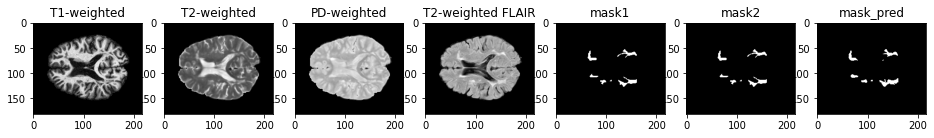

In [35]:
plt.figure(figsize = (16,32))
plt.subplot(1,7,1)
plt.imshow(img[0,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T1-weighted')
plt.subplot(1,7,2)
plt.imshow(img[1,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted')
plt.subplot(1,7,3)
plt.imshow(img[2,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('PD-weighted')
plt.subplot(1,7,4)
plt.imshow(img[3,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted FLAIR')
plt.subplot(1,7,5)
plt.imshow(mask1.cpu().numpy()[:,:,90],'gray')
plt.title('mask1')
plt.subplot(1,7,6)
plt.imshow(mask2.cpu().numpy()[:,:,90],'gray')
plt.title('mask2')
plt.subplot(1,7,7)
plt.imshow(mask_pred[:,:,90],'gray')
plt.title('mask_pred')

print('Manual Volume for mask1:',mask1.cpu().numpy().sum())
print('Manual Volume for mask2:',mask2.cpu().numpy().sum())
print('Segmentation Volume:',mask_pred.sum())

In [36]:
img, mask1 = test_dataset_mask1[1]
img, mask2 = test_dataset_mask2[1]
result = net(img.unsqueeze(0).to(device)).detach()
mask_pred = result.cpu().numpy()[0,0,:,:,:]
mask_pred[mask_pred>0.1] = 1
mask_pred[mask_pred<=0.1] = 0
print(mask_pred.shape)

(181, 217, 181)


Manual Volume for mask1: 31494.0
Manual Volume for mask2: 4013.0
Segmentation Volume: 9263.0


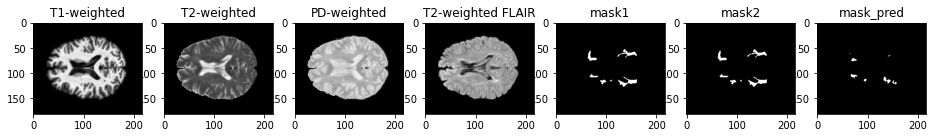

In [37]:
plt.figure(figsize = (16,32))
plt.subplot(1,7,1)
plt.imshow(img[0,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T1-weighted')
plt.subplot(1,7,2)
plt.imshow(img[1,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted')
plt.subplot(1,7,3)
plt.imshow(img[2,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('PD-weighted')
plt.subplot(1,7,4)
plt.imshow(img[3,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted FLAIR')
plt.subplot(1,7,5)
plt.imshow(mask1.cpu().numpy()[:,:,90],'gray')
plt.title('mask1')
plt.subplot(1,7,6)
plt.imshow(mask2.cpu().numpy()[:,:,90],'gray')
plt.title('mask2')
plt.subplot(1,7,7)
plt.imshow(mask_pred[:,:,90],'gray')
plt.title('mask_pred')

print('Manual Volume for mask1:',mask1.cpu().numpy().sum())
print('Manual Volume for mask2:',mask2.cpu().numpy().sum())
print('Segmentation Volume:',mask_pred.sum())

### Comparing with original and preprocessed

In [14]:
test_datapath = '/scratch/hp2173/testdata_website'

In [15]:
class MRITestDataset(Dataset):
    def __init__(self, img_path_list, IF_TRAIN= False):
        self.mri_path_list = img_path_list
        self.IF_TRAIN = IF_TRAIN
        #self.transform=transforms.Compose([transforms.Normalize((0.5,),(0.5,))])
        self.mri_list = self.preprocess() 

    def __len__(self):
        return len(self.mri_list)

    def preprocess(self):
        mri_list = []
        for idx in tqdm(range(len(self.mri_path_list))):
            mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
            mri_t2f = (mri_t2f-mri_t2f.min())/(mri_t2f.max()-mri_t2f.min())
            
            mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
            mri_t1w = (mri_t1w-mri_t1w.min())/(mri_t1w.max()-mri_t1w.min())
            
            mri_pd = torch.Tensor(nib.load(self.mri_path_list[idx][2]).get_data())
            mri_pd = (mri_pd-mri_pd.min())/(mri_pd.max()-mri_pd.min())
            
            mri_t2w = torch.Tensor(nib.load(self.mri_path_list[idx][3]).get_data())
            mri_t2w = (mri_t2w-mri_t2w.min())/(mri_t2w.max()-mri_t2w.min())
            
            mri = torch.cat((mri_t1w.unsqueeze(0),mri_t2w.unsqueeze(0),mri_pd.unsqueeze(0),mri_t2f.unsqueeze(0)),axis=0)
        
            
            mri_list.append(mri)

        return mri_list

    def __getitem__ (self,idx):
        img = self.mri_list[idx]
        return img

In [16]:
second_testing_path_list = []
for i in range(1,15):
    if i<10:
        second_testing_path_list.append('test0' + str(i) + '/')
    else:
        second_testing_path_list.append('test' + str(i) + '/')
        
print(second_testing_path_list)
mri_test_list = []

for i in range(14):
    timepoint1_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_01_*.nii')
    timepoint2_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_02_*.nii')
    timepoint3_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_03_*.nii')
    timepoint4_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_04_*.nii')
    if (i==1 or i==9 or i==10 or i==13):
        timepoint5_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_05_*.nii')
    if i==9: 
        timepoint6_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_06_*.nii') 
        print(timepoint6_path)
    
    timepoint1_list = sorted(glob.glob(timepoint1_path))
    timepoint2_list = sorted(glob.glob(timepoint2_path))
    timepoint3_list = sorted(glob.glob(timepoint3_path))
    timepoint4_list = sorted(glob.glob(timepoint4_path))

    
    if (i==1 or i==9 or i==10 or i==13):
        timepoint5_list = sorted(glob.glob(timepoint5_path))
    if i==9:
        timepoint6_list = sorted(glob.glob(timepoint6_path))
    
    mri_test_list.append(timepoint1_list)
    mri_test_list.append(timepoint2_list)
    mri_test_list.append(timepoint3_list)
    mri_test_list.append(timepoint4_list)

    if (i==1 or i==9 or i==10 or i==13):
        mri_test_list.append(timepoint5_list)

    if i==9:
        mri_test_list.append(timepoint6_list)
        

print('Data Collected:', len(mri_test_list))

['test01/', 'test02/', 'test03/', 'test04/', 'test05/', 'test06/', 'test07/', 'test08/', 'test09/', 'test10/', 'test11/', 'test12/', 'test13/', 'test14/']
/scratch/hp2173/testdata_website/test10/preprocessed/*_06_*.nii
Data Collected: 61


In [17]:
test_dataset = MRITestDataset(mri_test_list, IF_TRAIN= True)

  0%|          | 0/61 [00:00<?, ?it/s]<ipython-input-15-cca191b18e00>:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-15-cca191b18e00>:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-15-cca191b18e00>:20: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more p

In [18]:
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=1, 
                                         shuffle=False, 
                                         num_workers=0)

In [19]:
def pre_and_save(net, dataloader):
    net = net.eval()
    num_list = [4,5,4,4,4,4,4,4,4,6,5,4,4,5]
    cnt_num = 0;
    cnt = 0;
    for i, test_input in enumerate(dataloader):
        test_input = test_input.to(device)
        with torch.no_grad():
            pred = net(test_input[0].unsqueeze(0).to(device)).detach()
            pred[pred>0.35] = 1
            pred[pred<=0.35] = 0
            pred = pred.cpu().numpy().squeeze()
            new_image = nib.Nifti1Image(pred, np.eye(4)) 
            
        if (cnt == num_list[cnt_num]):
            cnt_num += 1
            cnt = 0;
        if i < 37:
            nib.save(new_image, '/scratch/hp2173/mri/results/self_attention_decoder_3d_unet/' + 'test0' + str(cnt_num+1) + '_0' + str(cnt+1)+ '_NYU.nii')
        else:
            nib.save(new_image, '/scratch/hp2173/mri/results/self_attention_decoder_3d_unet/' + 'test' + str(cnt_num+1) + '_0' + str(cnt+1)+ '_NYU.nii')
        cnt = cnt+1

In [20]:
num_list = [4,5,4,4,4,4,4,4,4,6,5,4,4,5]
print(sum(num_list))

61


In [23]:
pre_and_save(net, test_loader)

(181, 217, 181)


<ipython-input-26-1a374869436c>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  testimg = nib.load('/scratch/hp2173/mri/results/self_attention_decoder_3d_unet/test10_02_NYU.nii').get_data()


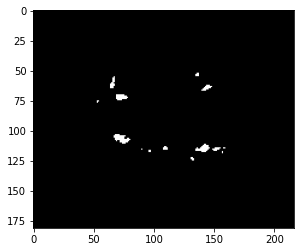

In [26]:
testimg = nib.load('/scratch/hp2173/mri/results/self_attention_decoder_3d_unet/test10_02_NYU.nii').get_data()
print(testimg.shape)
plt.imshow(testimg[:,:,90], cmap='gray')